<center>
   <img src="logounam.png"width="150">
</center>


  <font size="6"><b> <center> Universidad Nacional Autónoma de México     </b> <br> </font>
  <font size="4"><b> <center> Posgrado en Ciencias de la Tierra </b><br> </font>
  <font size="3"> <center> 1D CNN implementation for Seismic Event detection in Paricutin Data </b> <br> </font>
  <font size="3"><b> <center>@Author: MSc. Kevin Axel Vargas-Zamudio </b> <br> </font>
  <font size="3"><b> <center>email: seismo.ai.kevvargas@gmail.com </b><br></font>

# Observed data for 2022 Paricutin Seismic Swarm
## Seismo-volcanic time series classification for Local Seismic Event Detection
### LSTM Recurrent Neural Network implementation

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.io import loadmat,savemat

from os.path import dirname, join as pjoin
import sys
import copy as copy

import os
import time
import random

In [25]:
def retrieve_Xinput_Ytarget(years,months,day_30,day_31):
    # Retrieving .mat files from /res directory for a single day
    path = 'X_input_mat/'

    mat_fname = []
    
    for year in years[0:1]:
        for month in months[8:12]:#[8:11]
            if  month == '01' or month == '03' or month == '05' or month == '07' \
            or month == '08' or month == '10' or month == '12':
                days = copy.copy(day_31)
            elif month == '04' or month == '06' or month == '09' or month == '11':
                days = copy.copy(day_30)

            for day in days:#[15:]:##daysssss
#                 for i in range(1,24):
#                     #month_day = month + 
#                     if i <= 9:
#                         mat_fname.append(path + 'Xinput_'+ year + '_' + month + '_' + day +'_0' + str(i) + '.mat')
#                     else:
#                         mat_fname.append(path + 'Xinput_'+ year + '_' + month + '_' + day + '_' + str(i) + '.mat')
                        
                mat_fname.append(path + 'Xinput_'+ year + '_' + month + '_' + day + '.mat')
 
    # .mat file list for a complete day (each .mat data file for 1 of 24 hours)
    data = []
    #Xinput
    for i in range(len(mat_fname)):
        data.append(loadmat(mat_fname[i]))

    # Keys for data day dictionary
    data_day = list()
    for s in range(len(data[:])):
        data_day.append(data[s])
    #print(data_day[s])
    
    return data, data_day
        

In [26]:
def retrieve_specific_Xinput_Ytarget(date):
    n = len(date)
    path = 'X_input_mat/'
    mat_fname = []
    data = []
    
    for i in range(n):
        year = date[i][0:4]
        month = date[i][5:7]
        day = date[i][8:]
        print('Xinput_'+ year + '_' + month + '_' + day + '.mat')
    
    # Retrieving .mat files from /res directory for a single day
        mat_fname.append(path + 'Xinput_'+ year + '_' + month + '_' + day + '.mat')
    # .mat file list for a complete day (each .mat data file for 1 of 24 hours)
    
    #Xinput
    for i in range(len(mat_fname)):
        data.append(loadmat(mat_fname[i]))
        
    # Keys for data day dictionary
    data_day = list()
    for s in range(len(data[:])):
        data_day.append(data[s])  
    return data, data_day

In [27]:
def month_day_str():
    month = []
    day1 = [] ; day2 = []

    for i in range(1,13):
        if i <= 9:
            month.append('0'+str(i))
        else:
            month.append(str(i))
    for i in range(1,31):
        if i <= 9:
            day1.append('0'+str(i))
        else:
            day1.append(str(i))
            
    day2 = copy.copy(day1)
    day2.append('31')
    
    return month, day1, day2

In [28]:
# Loading X_input noise
path = 'X_input_mat/'
noise_mat = loadmat(path + 'Xinput_noise.mat')
#noise_mat

In [29]:
x_noise = noise_mat['Xinput_noise']
y_noise = noise_mat['Ytarget_noise'].reshape(-1)
x_noise.shape
y_noise.shape

(503,)

In [30]:
months[11:12]

['12']

In [31]:
months , day_30, day_31 = month_day_str()
years = ['2022', '2023']
months[11:12]
data,data_day = retrieve_Xinput_Ytarget(years,months,day_30,day_31)
len(data[:])#['Xinput'][0])

122

In [32]:
#plt.plot(data[0]['Xinput'][49])

In [33]:
i = 0
end = len(data[i]['Xinput'][:])
print(end)
data[i]['Xinput'][:]

7


array([[0.61327451, 0.29957034, 0.20416435, ..., 0.07334058, 0.06207641,
        0.08645742],
       [0.2180179 , 0.20501115, 0.16777014, ..., 0.0889613 , 0.0719317 ,
        0.06694548],
       [0.1025145 , 0.16901604, 0.17037017, ..., 0.18616318, 0.16712538,
        0.14540572],
       ...,
       [0.39312517, 0.40450883, 0.28744172, ..., 0.02199339, 0.02131361,
        0.01868851],
       [0.80777803, 0.77664068, 0.56205897, ..., 0.27910763, 0.29011064,
        0.25104829],
       [0.76476204, 0.7557564 , 0.68716875, ..., 0.12532862, 0.10412614,
        0.10303399]])

In [34]:
# Reading X input and y target

#data = loadmat(path + 'Xinput_2022_09_03')
months , day_30, day_31 = month_day_str()
years = ['2022', '2023']

# loading X_input Signal
data,data_day = retrieve_Xinput_Ytarget(years,months,day_30,day_31)

Xinput = []
for i in range(len(data)):
    Xinput.append(data[i]['Xinput'])
    
ones = [91,92,94,101,102,108,111]
twos = [106,107]
threes = [112,115]
sixes = [3,4,18,19,25,27,33,38,39,43,44,46,49,52,55,56,57,59,62,64,70,71,73,82,83,86]
twelves = [22,26,37,47,51,65,85,88,90]
eighteens = [21,50,80]

aux = 0
for i in range(len(data)):
    if i in ones:
        aux += len(data[i]['Xinput'][:-1])
    elif i in twos:
        aux += len(data[i]['Xinput'][:-2])    
    elif i in threes:
        aux += len(data[i]['Xinput'][:-3])
    elif i in sixes:
        aux += len(data[i]['Xinput'][:-6])
    elif i in twelves:
        aux += len(data[i]['Xinput'][:-12])
    elif i in eighteens:
        aux += len(data[i]['Xinput'][:-18])
    else:
        aux += len(data[i]['Xinput'])
print(f'Number of signals:{aux}')
# Adding the number of noise windows
aux += len(x_noise[:,0])

print(len(x_noise[:,0]),aux)
Nsamp_win = len(data[0]['Xinput'][0])
Nlabels   = len(data[0]['Ytarget'][0])

X_input = np.zeros((aux,Nsamp_win))
Y_target = np.zeros((aux))

aux = 0
for i in range(len(data)): # 91 days
    if i in ones:
        for j in range(len(data[i]['Xinput'][:-1])):   # variable lenght, number of 'good' events per day
            X_input[aux,:] = data[i]['Xinput'][j]
            Y_target[aux]  = data[i]['Ytarget'][0][j]
            aux += 1
    elif i in twos:
        for j in range(len(data[i]['Xinput'][:-2])):   # variable lenght, number of 'good' events per day
            X_input[aux,:] = data[i]['Xinput'][j]
            Y_target[aux]  = data[i]['Ytarget'][0][j]
            aux += 1
    elif i in threes:
        for j in range(len(data[i]['Xinput'][:-3])):   # variable lenght, number of 'good' events per day
            X_input[aux,:] = data[i]['Xinput'][j]
            Y_target[aux]  = data[i]['Ytarget'][0][j]
            aux += 1
    elif i in sixes:
        for j in range(len(data[i]['Xinput'][:-6])):   # variable lenght, number of 'good' events per day
            X_input[aux,:] = data[i]['Xinput'][j]
            Y_target[aux]  = data[i]['Ytarget'][0][j]
            aux += 1
    elif i in twelves:
        for j in range(len(data[i]['Xinput'][:-12])):   # variable lenght, number of 'good' events per day
            X_input[aux,:] = data[i]['Xinput'][j]
            Y_target[aux]  = data[i]['Ytarget'][0][j]
            aux += 1
    elif i in eighteens:
        for j in range(len(data[i]['Xinput'][:-18])):   # variable lenght, number of 'good' events per day
            X_input[aux,:] = data[i]['Xinput'][j]
            Y_target[aux]  = data[i]['Ytarget'][0][j]
            aux += 1
    else:
        for j in range(len(data[i]['Xinput'])):
            X_input[aux,:] = data[i]['Xinput'][j]
            Y_target[aux]  = data[i]['Ytarget'][0][j]
            aux += 1

# #for j in range(len(noise)):
X_input[aux:,:] = x_noise[:,:]#x_noise[:50,:]
Y_target[aux:] = y_noise[:]

print(Nsamp_win,Nlabels)

Number of signals:2286
503 2789
400 7


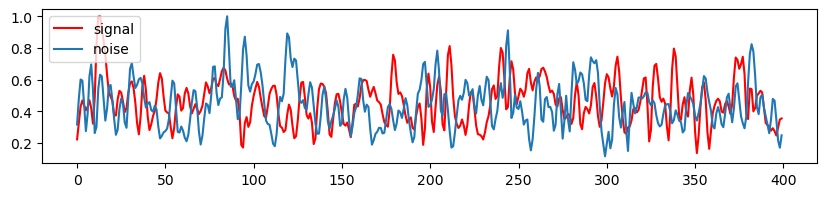

In [35]:
plt.figure(figsize=(10,2))
plt.plot(X_input[2287,:],color='red',label='signal')
plt.plot(X_input[2705,:],label='noise')
plt.legend()

In [2]:
#plt.hist(Y_target)


In [1]:
#plt.hist(X_input)

In [35]:
# import numpy as np
# x = np.zeros((100))
# noise = np.ones((50))

# for i in range(50):
#     x[i] = 1
# x[50:] = noise[:]
# x

In [10]:
X_input.shape

(2789, 400)

In [11]:
Y_target.shape

(2789,)

In [12]:
months[8:12]

['09', '10', '11', '12']

In [36]:
def manual_train_test_split(perc_train,perc_test,Xinput,ytarget):
    # Selecting random sample from global input dataset
    
    Ninput = X_input.shape[0]
    Nwin = X_input.shape[1]
    Ntrain = int(Ninput * perc_train)
    Ntest  = int(Ninput * perc_test )
    
    # Extracting random index vector
    X_idx = np.arange(0,Ninput,1)
    random.seed(7)
    train_idx = random.sample(list(X_idx),Ntrain)
    train_idx_sorted = sorted(train_idx)
    np.asarray(train_idx_sorted)
    
    test_idx = np.delete(X_idx,train_idx_sorted)
    test_idx = np.delete(test_idx,-1)
    print(len(train_idx_sorted),len(test_idx))
    
    # Excluding train samples from Total input samples = test samples
    Xtrain = X_input[train_idx_sorted]
    #Xtest= np.delete(X_input,train_idx_sorted,axis=0)
    Xtest = X_input[test_idx]
    
    # Target train and test vectors
    ytrain = Y_target[train_idx_sorted]
    ytest = Y_target[test_idx]
    ytrain = ytrain.astype(int)
    ytest = ytest.astype(int)
    
    #np.shape(Xtest)
    #Xtrain = np.asarray(Xtrain)
    Xtrain = Xtrain.reshape((Ntrain, Nwin, -1))
    
    #Xtest = np.asarray(Xtest)
    Xtest = Xtest.reshape((Ntest, Nwin, -1))
    
    ytrain = np.reshape(ytrain,(-1,1))
    ytest  = np.reshape(ytest,(-1,1))

    print(Ntrain,Ntest)
    print(f'Xtrain Shape: {np.shape(Xtrain)} , ytrain Shape: {np.shape(ytrain)} \n')
    print(f'Xtest Shape:  {np.shape(Xtest)}  , ytest Shape:  {np.shape(ytest)} \n')
    
    return Xtrain, ytrain, Xtest, ytest


In [39]:
# Calling manual function for splitting the Input Dataset
perc_train = 0.75
perc_test  = 0.25

Xtrain,ytrain,Xtest,ytest = manual_train_test_split(perc_train,perc_test,X_input,Y_target)

2091 697
2091 697
Xtrain Shape: (2091, 400, 1) , ytrain Shape: (2091, 1) 

Xtest Shape:  (697, 400, 1)  , ytest Shape:  (697, 1) 



In [38]:
# Train test splitting using SKlearn
from sklearn.model_selection import train_test_split
test_s = 0.3
Xtrain, Xtest, ytrain, ytest = train_test_split(X_input, Y_target, test_size=test_s, random_state=42)

Ninput = X_input.shape[0]
Nwin = X_input.shape[1]

perc_train = 1.0 - test_s
perc_test  = test_s

Ntrain = int(Ninput * perc_train)
Ntest  = int(Ninput * perc_test )
Xtrain = Xtrain.reshape((Ntrain, Nwin, -1))
#Xtest = Xtest.reshape((Ntest, Nwin, -1))

In [511]:
# Class transform to matrix form using one-hot encoding
# from tensorflow.keras.utils import to_categorical
# ytrain = to_categorical(ytrain)
# ytest  = to_categorical(ytest)

In [197]:
# ytrain[0:12,:]

In [40]:
print(f'X,y train dataset shape: {np.shape(Xtrain)} , {np.shape(ytrain)}')
print(f'X,y test dataset shape:  {np.shape(Xtest)}  , {np.shape(ytest)}')

X,y train dataset shape: (2091, 400, 1) , (2091, 1)
X,y test dataset shape:  (697, 400, 1)  , (697, 1)


In [41]:
print(len(Xtest[:]))

697


In [42]:
ytest = ytest[:].reshape(-1).astype(int)
ytrain = ytrain[:].reshape(-1).astype(int)
ytrain

array([1, 1, 1, ..., 0, 0, 0])

In [43]:
# Counting number of labels for each class

print(np.unique(ytrain,return_counts=True))
print(np.unique(ytest,return_counts=True))

(array([0, 1]), array([ 381, 1710]))
(array([0, 1]), array([122, 575]))


400


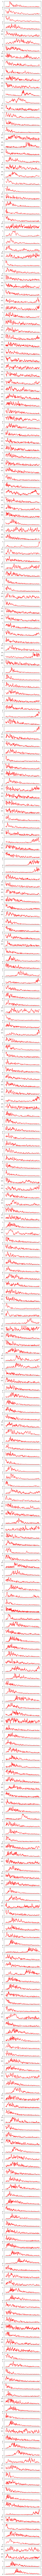

In [82]:
# Checking Xtest and ytest
print(len(Xtest[0]))
#Xtest
N = len(Xtest[:])
mpl.rcParams['figure.figsize'] = [5,int(N/2)]
fig,ax = plt.subplots(int(N/2),1)
for i in range(int(N/2)):
    if ytest[i] == 1:
        color = 'red'
    else:
        color = 'gray'
        
    ax[i].plot(Xtest[i],color=color)
    #ax[i].set_ylim(0,1)
    ax[i].tick_params(left = False, right = False , labelleft = True ,
    labelbottom = False, bottom = False, labeltop = False)

# Neural Network Architecture, definition and parameters:
- Convolutional layers:
- Pooling layers:
- Dropout layers:
- Dense Layer
- Activation function: Sigmoid, tanh, ReLu, Linear
- Descent Gradient optimization method: ADAM
- Loss Function: Binary Crossentropy 

In [44]:
import tensorflow as tf
# 1D CNN architecture: Convolution, Dropout, Pooling, Dense
#from tensorflow.keras.layers import Conv1D,Dense,Dropout,MaxPool1D,InputLayer,Flatten,GlobalAveragePooling1D
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import Input,optimizers
from tensorflow.keras.models import Model

In [22]:
Xtrain[0].shape

(400, 1)

In [45]:
Xtrain.shape

(2091, 400, 1)

## FIRST ARCHITECTURE ATTEMPT:
* LSTM - Dense - Output

In [73]:
# 1D LSTM Recurrent Neural Network for seismic time series classification

input_shape = tf.TensorShape(Xtrain[0].shape)
print(input_shape)

units = 64
nclass = 1
activation = 'sigmoid'

i = Input(shape=input_shape)
x = LSTM(units = units,activation=activation)(i) # Sigmoid for Classification
#x = Dense(units,activation = activation)(x)
x = Dense(nclass,activation='sigmoid')(x)

model = Model(i,x)
model_name = 'RNN_1D_LSTM_DO '
model.summary()

(400, 1)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 400, 1)]          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [65]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten
def construct_model():
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 1), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(12, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [68]:
# from ann_visualizer.visualize import ann_viz
# model=construct_model()
# ann_viz(model, view=True, filename='LSTM_simple_model', title='LSTM Simple Architecture')

In [74]:
# Training the convolutional neural network
import time
start_time = time.time()

# Stablish the model compile parameters
lr = 0.0001
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam
              (learning_rate=lr),metrics = 'accuracy')
verbose = 2
np.shape(Xtrain)
CNN1 = model.fit(Xtrain,ytrain,validation_data=(Xtest,ytest),epochs=100,verbose=verbose)#,batch_size=2)

print("---RNN1D training and testing time execution: %s seconds ---" % (time.time() - start_time))

Epoch 1/100
66/66 - 17s - loss: 0.6200 - accuracy: 0.7700 - val_loss: 0.5459 - val_accuracy: 0.8250 - 17s/epoch - 259ms/step
Epoch 2/100
66/66 - 14s - loss: 0.5162 - accuracy: 0.8178 - val_loss: 0.4834 - val_accuracy: 0.8250 - 14s/epoch - 211ms/step
Epoch 3/100
66/66 - 13s - loss: 0.4802 - accuracy: 0.8178 - val_loss: 0.4639 - val_accuracy: 0.8250 - 13s/epoch - 199ms/step
Epoch 4/100
66/66 - 12s - loss: 0.4712 - accuracy: 0.8178 - val_loss: 0.4596 - val_accuracy: 0.8250 - 12s/epoch - 175ms/step
Epoch 5/100
66/66 - 13s - loss: 0.4690 - accuracy: 0.8178 - val_loss: 0.4583 - val_accuracy: 0.8250 - 13s/epoch - 197ms/step
Epoch 6/100
66/66 - 13s - loss: 0.4675 - accuracy: 0.8178 - val_loss: 0.4567 - val_accuracy: 0.8250 - 13s/epoch - 196ms/step
Epoch 7/100
66/66 - 14s - loss: 0.4663 - accuracy: 0.8178 - val_loss: 0.4557 - val_accuracy: 0.8250 - 14s/epoch - 205ms/step
Epoch 8/100
66/66 - 14s - loss: 0.4650 - accuracy: 0.8178 - val_loss: 0.4544 - val_accuracy: 0.8250 - 14s/epoch - 209ms/step


66/66 - 15s - loss: 0.1675 - accuracy: 0.9450 - val_loss: 0.1621 - val_accuracy: 0.9340 - 15s/epoch - 225ms/step
Epoch 67/100
66/66 - 15s - loss: 0.1642 - accuracy: 0.9488 - val_loss: 0.1581 - val_accuracy: 0.9397 - 15s/epoch - 223ms/step
Epoch 68/100
66/66 - 15s - loss: 0.1614 - accuracy: 0.9503 - val_loss: 0.1547 - val_accuracy: 0.9383 - 15s/epoch - 225ms/step
Epoch 69/100
66/66 - 15s - loss: 0.1604 - accuracy: 0.9512 - val_loss: 0.1524 - val_accuracy: 0.9397 - 15s/epoch - 224ms/step
Epoch 70/100
66/66 - 16s - loss: 0.1583 - accuracy: 0.9555 - val_loss: 0.1507 - val_accuracy: 0.9426 - 16s/epoch - 236ms/step
Epoch 71/100
66/66 - 15s - loss: 0.1565 - accuracy: 0.9536 - val_loss: 0.1487 - val_accuracy: 0.9455 - 15s/epoch - 228ms/step
Epoch 72/100
66/66 - 15s - loss: 0.1562 - accuracy: 0.9541 - val_loss: 0.1474 - val_accuracy: 0.9469 - 15s/epoch - 232ms/step
Epoch 73/100
66/66 - 15s - loss: 0.1547 - accuracy: 0.9560 - val_loss: 0.1457 - val_accuracy: 0.9484 - 15s/epoch - 230ms/step
Epoch

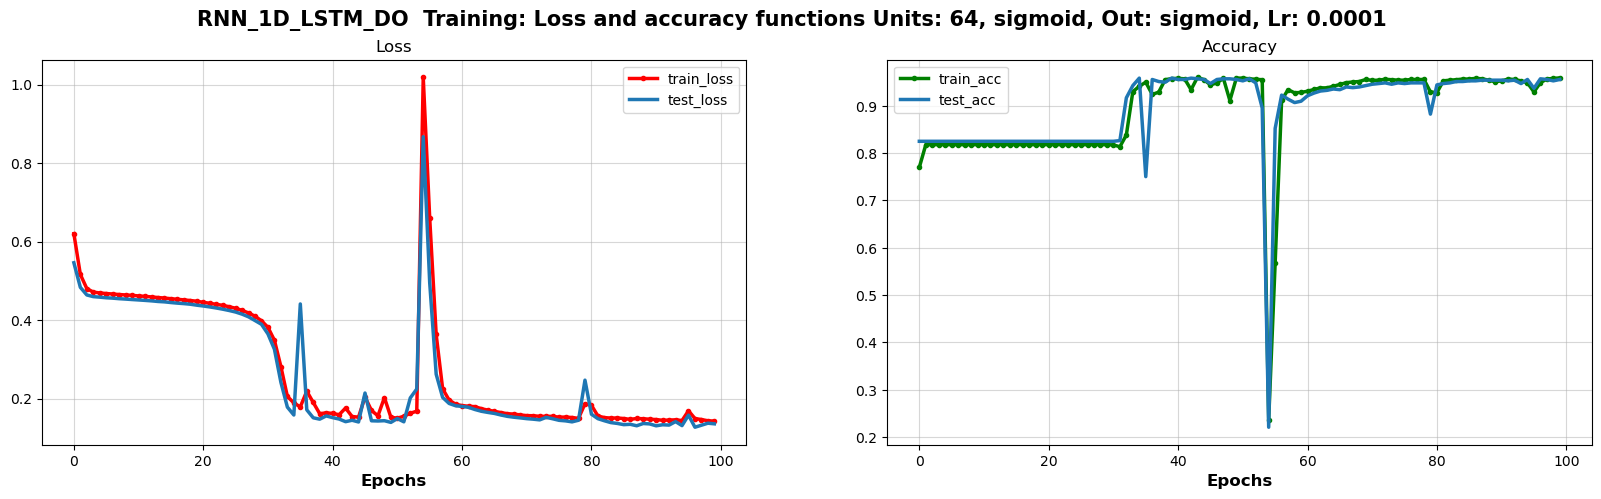

In [76]:
fig = plt.figure(figsize=(20,5))
plt.suptitle(f'{model_name} Training: Loss and accuracy functions Units: {units}, {activation}, Out: {activation}, Lr: {lr}',\
             fontsize=15,weight='bold')
ax1 = plt.subplot(121)
ax1.title.set_text('Loss')
ax1.plot(CNN1.history['loss'],color='red',linewidth=2.5,marker = '.',label='train_loss')
ax1.plot(CNN1.history['val_loss'],label='test_loss',linewidth=2.5,linestyle='-')
ax1.set_xlabel('Epochs',fontsize=12,weight='bold')
ax1.legend()
ax1.grid(alpha=0.5)
ax2 = plt.subplot(122)
ax2.title.set_text('Accuracy')
ax2.plot(CNN1.history['accuracy'],color='green',linewidth=2.5,marker='.',label='train_acc')
ax2.plot(CNN1.history['val_accuracy'],label='test_acc',linewidth=2.5,linestyle='-')
ax2.set_xlabel('Epochs',fontsize=12,weight='bold')
ax2.legend()
ax2.grid(alpha=0.5)
fig.savefig(f'{model_name}_Loss_Accuracy_Adam_Units{str(units)}_{activation}.png'\
            ,bbox_inches='tight',pad_inches=0,dpi=100)
#files.download("\content\drive\SeismoAI\Loss_Accuracy_Adam.png") 

In [75]:
score = model.evaluate(Xtest, ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1355825662612915
Test accuracy: 0.955523669719696


In [77]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,
                           title='Confusion Matrix',cmap = plt.cm.Blues):
    if normalize:
        
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('matriz de confusión normalizada')
    else:
        print('Matriz de confusión sin normalización')
  
    print(cm)
    fig = plt.figure(figsize=(20,5))
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')
    plt.show()

# # PLoteando matriz de confusión
# p_test = model.predict(Xtest).argmax(axis=1)
# cm = confusion_matrix(ytest,p_test)
# plot_confusion_matrix(cm,list(range(2)))

In [78]:
Xtest.shape

(697, 400, 1)

22/22 [==============================] - 2s 82ms/step
Matriz de confusión sin normalización
[[111  11]
 [ 20 555]]


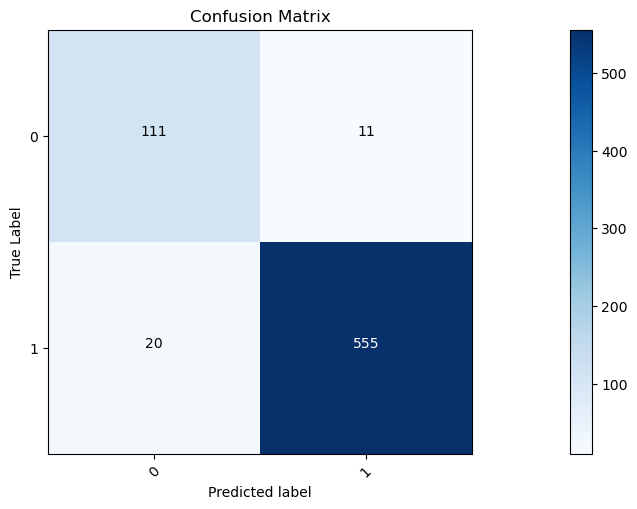

In [79]:
p_test = model.predict(Xtest)#.argmax(axis=0)
#cm = confusion_matrix(ytest,p_test)
len(p_test)
#np.mean(p_test)
p_test.min()
p_test.max()
p_good = np.zeros((len(p_test[:])),dtype = int)

for i in range(len(p_test[:])):
    if p_test[i]<=0.5:
        p_good[i] = 0
    else:
        p_good[i] = 1
p_good
cm = confusion_matrix(ytest,p_good)
plot_confusion_matrix(cm,list(range(2)))

In [107]:
for i in range(len(p_good)):
    print(f'index: {i}, Prediction: {p_good[i]},  True: {ytest[i][0]}')

index: 0, Prediction: 1,  True: 1
index: 1, Prediction: 1,  True: 1
index: 2, Prediction: 1,  True: 1
index: 3, Prediction: 1,  True: 1
index: 4, Prediction: 0,  True: 1
index: 5, Prediction: 1,  True: 1
index: 6, Prediction: 1,  True: 1
index: 7, Prediction: 1,  True: 1
index: 8, Prediction: 1,  True: 1
index: 9, Prediction: 1,  True: 1
index: 10, Prediction: 0,  True: 1
index: 11, Prediction: 0,  True: 1
index: 12, Prediction: 1,  True: 1
index: 13, Prediction: 1,  True: 1
index: 14, Prediction: 0,  True: 1
index: 15, Prediction: 1,  True: 1
index: 16, Prediction: 1,  True: 1
index: 17, Prediction: 1,  True: 1
index: 18, Prediction: 0,  True: 1
index: 19, Prediction: 0,  True: 1
index: 20, Prediction: 1,  True: 1
index: 21, Prediction: 1,  True: 1
index: 22, Prediction: 0,  True: 1
index: 23, Prediction: 1,  True: 1
index: 24, Prediction: 1,  True: 1
index: 25, Prediction: 1,  True: 1
index: 26, Prediction: 1,  True: 1
index: 27, Prediction: 1,  True: 1
index: 28, Prediction: 1,  Tru

In [267]:
#p_prob = model.predict_proba(Xtest)

Text(0.5, 1.0, 'True label: 1 , Predicted label: 0, Index: 179')

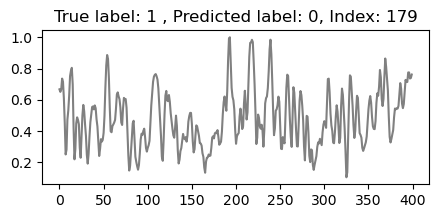

In [88]:
# Some misclassified data
fig = plt.figure(figsize=(5,2))
mal_ind = np.where(p_good != ytest)[0]
mal_ind = np.unique(mal_ind)
i = np.random.choice(mal_ind)
plt.plot(Xtest[i],color='gray')
plt.title('True label: %s , Predicted label: %s, Index: %s' %(ytest[i],p_good[i],i))

In [140]:
mal_ind.shape
mal_ind

array([ 30,  34,  49,  66,  71,  76,  80,  88, 106, 116, 136, 179, 206,
       232, 263, 314, 328, 344, 381, 387, 426, 452, 510, 530, 580, 610,
       613, 614, 638, 644, 660, 668, 684])

### Performance evaluation of 1D CNN on some examples out of the Training and testing datasets

In [32]:
# Retreiving data
date = []

date.append('2023_01_10')
date.append('2023_01_01')
date.append('2022_07_01')
date.append('2022_08_01')

data,data_day =retrieve_specific_Xinput_Ytarget(date)


Xinput_2023_01_10.mat
Xinput_2023_01_01.mat
Xinput_2022_07_01.mat
Xinput_2022_08_01.mat


In [112]:
len(data[:])

4

In [33]:
aux = 0
for i in range(len(data)):
    aux += len(data[i]['Xinput'])
                   
print(aux)
Nsamp_win = len(data[0]['Xinput'][0])
Nlabels   = len(data[0]['Ytarget'][0])

X_input = np.zeros((aux,Nsamp_win))
Y_target = np.zeros((aux))

aux = 0
for i in range(len(data)): # 91 days
    for j in range(len(data[i]['Xinput'])):   # variable lenght, number of 'good' events per day
        X_input[aux,:] = data[i]['Xinput'][j]
        Y_target[aux]  = data[i]['Ytarget'][0][j]
        aux += 1
print(aux)

5
5


In [62]:
X_input.shape
#Y_target.shape

(5, 400)

In [68]:
Xtest_out = X_input
#Xtest_out.reshape((5,400 , -1))
Xtest_out = np.reshape(Xtest_out, (Xtest_out.shape[0], Xtest_out.shape[1], -1))
ytest_out = Y_target.reshape(-1).astype(int)

In [69]:
ytest_out

array([1, 1, 1, 1, 1])

In [70]:
Xtest_out.shape

(5, 400, 1)

1/1 [==============================] - 0s 79ms/step
Matriz de confusión sin normalización
[[5]]


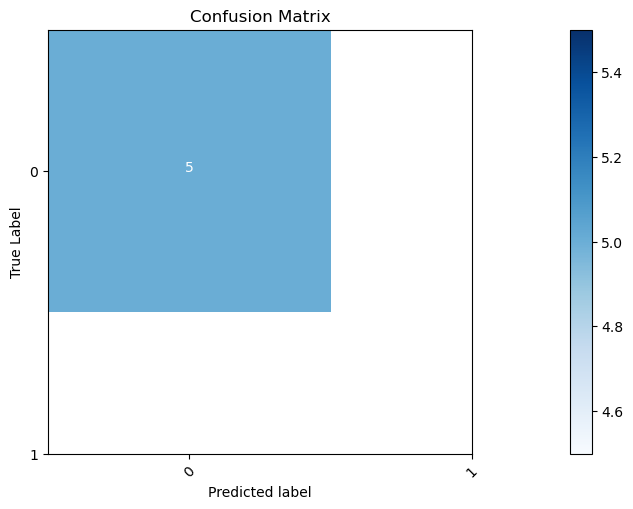

In [71]:
p_test_out = model.predict(Xtest_out)#.argmax(axis=0)
p_good_out = np.zeros((len(p_test_out[:])),dtype = int)

for i in range(len(p_test_out[:])):
    if p_test_out[i]<=0.5:
        p_good_out[i] = 0
    else:
        p_good_out[i] = 1
        
cm = confusion_matrix(ytest_out,p_good_out)
# cm = np.zeros((2,2))
# print(cm)
# cm[0,0] = 0
# cm[0,1] = 0
# cm[1,0] = 0
# cm[1,1] = 5
plot_confusion_matrix(cm,list(range(2)))

In [72]:
for i in range(len(p_test_out)):
    print(ytest_out[i] == p_good_out[i])

True
True
True
True
True


Text(0.5, 1.0, 'True label: 1 , Predicted label: 1, Index: 1')

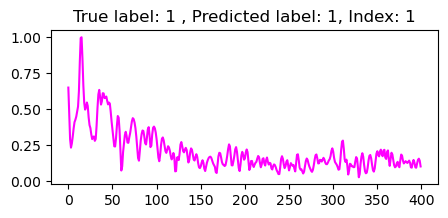

In [75]:
# Some misclassified data
fig = plt.figure(figsize=(5,2))
mal_ind = np.where(p_good_out == ytest_out)[0]
i = np.random.choice(mal_ind)
plt.plot(Xtest_out[i],color='magenta')
plt.title('True label: %s , Predicted label: %s, Index: %s' %(ytest_out[i],p_good_out[i],i))

### Testing the model on noise data examples from outside the training and testing sets

In [76]:
# Loading X_input noise
path = 'X_input_mat/'
noise_mat = loadmat(path + 'Xinput_noise_Test_Out.mat')
#noise_mat

In [77]:
x_noise = noise_mat['Xinput_noise']
y_noise = noise_mat['Ytarget_noise'].reshape(-1)
x_noise.shape
#y_noise.shape

(5, 400)

In [82]:
x_noise = np.reshape(x_noise, (x_noise.shape[0], x_noise.shape[1], -1))
x_noise.shape

(5, 400, 1)

In [83]:
y_noise

array([0, 0, 0, 0, 0])

Text(0.5, 1.0, 'Noise Test Out')

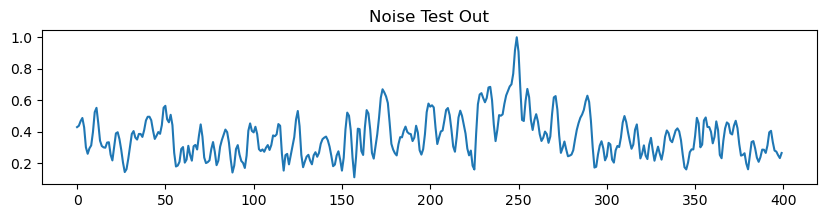

In [84]:
plt.figure(figsize=(10,2))
plt.plot(x_noise[0,:])
plt.title('Noise Test Out')

1/1 [==============================] - 0s 78ms/step
[[5]]
Matriz de confusión sin normalización
[[5]]


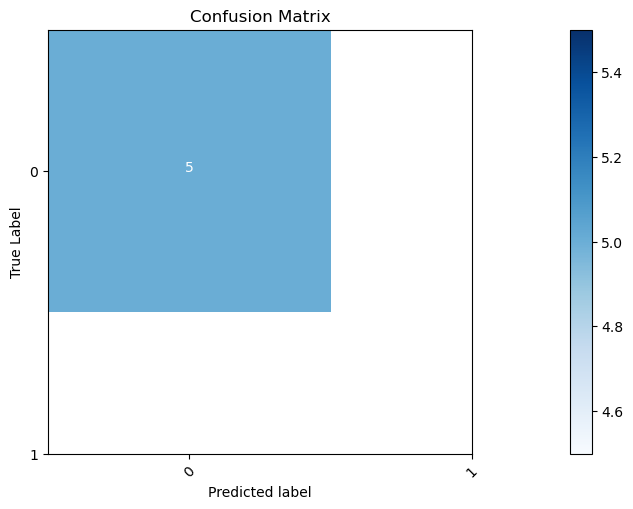

In [85]:
p_test_out = model.predict(x_noise)#.argmax(axis=0)
p_good_out = np.zeros((len(p_test_out[:])),dtype = int)

for i in range(len(p_test_out[:])):
    if p_test_out[i]<=0.5:
        p_good_out[i] = 0
    else:
        p_good_out[i] = 1
        
cm = confusion_matrix(y_noise,p_good_out)
print(cm)
plot_confusion_matrix(cm,list(range(2)))

In [86]:
for i in range(5):
    print(y_noise[i] == p_good_out[i])

True
True
True
True
True


In [87]:
y_noise

array([0, 0, 0, 0, 0])

In [88]:
p_good_out

array([0, 0, 0, 0, 0])

Text(0.5, 1.0, 'True label: 0 , Predicted label: 0, Index: 4')

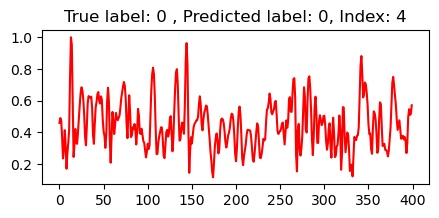

In [96]:
# Some misclassified data
fig = plt.figure(figsize=(5,2))
mal_ind = np.where(p_good_out == y_noise)[0]
i = np.random.choice(mal_ind)
plt.plot(x_noise[i],color='red')
plt.title('True label: %s , Predicted label: %s, Index: %s' %(y_noise[i],p_good_out[i],i))

In [165]:
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = 'accuracy')

#opt = SGD(lr=0.01, momentum=0.9)
#model.compile(loss='binary_crossentropy',optimizer='sgd',metrics = 'accuracy')